### **Ejercicios Planteados**

Ejercicio:

Suponga que le han pedido averiguar si existe una relación entre
el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido para los siguientes datos

### Para esto obtenga lo siguiente:

### 1. Obtenga la distribución de los datos

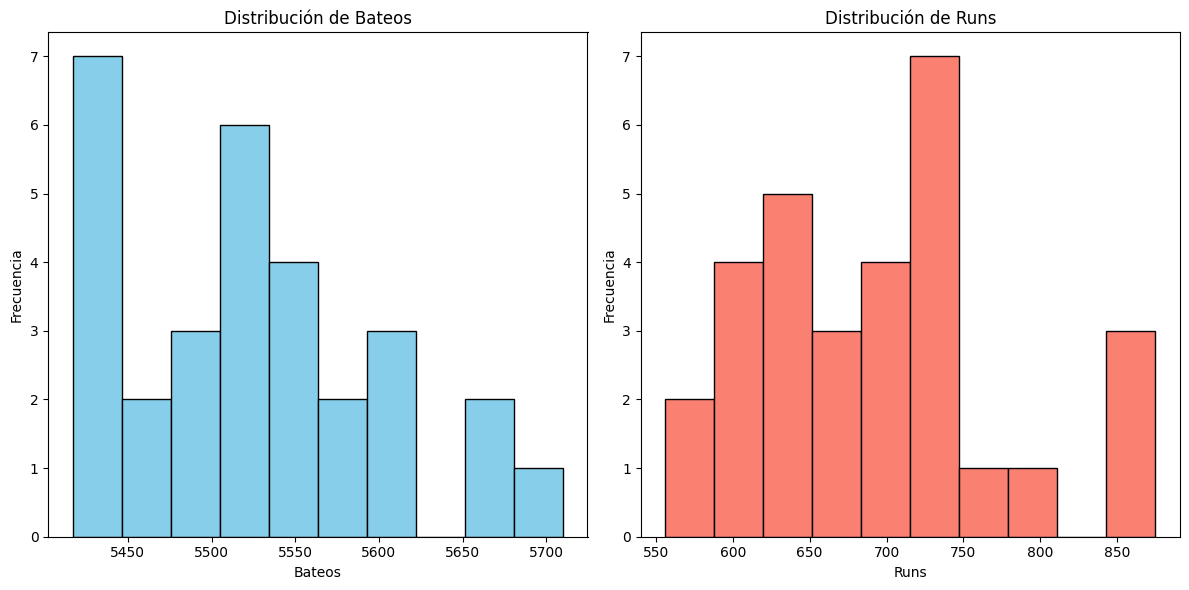

            bateos        runs
count    30.000000   30.000000
mean   5523.500000  693.600000
std      79.873067   82.479088
min    5417.000000  556.000000
25%    5448.250000  629.000000
50%    5515.500000  705.500000
75%    5575.000000  734.000000
max    5710.000000  875.000000


In [10]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Datos
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644,
        654, 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645,
        707, 641, 624, 570, 593, 556]
datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})


# Histograma de las variables 'bateos' y 'runs'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(datos['bateos'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Bateos')
plt.xlabel('Bateos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(datos['runs'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribución de Runs')
plt.xlabel('Runs')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
desc_stats = datos.describe()
print(desc_stats)

#### 2. Calcule la correlación de Pearson. Interprete su valor

In [11]:
# Calcular la correlación de Pearson
correlacion_pearson = datos['bateos'].corr(datos['runs'])

print("Correlación de Pearson entre Bateos y Runs:", correlacion_pearson)

Correlación de Pearson entre Bateos y Runs: 0.6106270467206688


### 3. Separe sus datos de entrenamiento en 80/20.

In [17]:
# Definir variables independientes (X) y dependientes (y)
X = datos[['bateos']]  # Variable independiente
y = datos['runs']       # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Número de muestras en el conjunto de entrenamiento:", X_train.shape[0])
print("Número de muestras en el conjunto de prueba:", X_test.shape[0])

Número de muestras en el conjunto de entrenamiento: 24
Número de muestras en el conjunto de prueba: 6


In [18]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(datos['bateos'].values.reshape(-1,1), datos['runs'].values.reshape(-1,1), test_size=0.2, random_state=42)

# Convertir las matrices en DataFrames y combinarlas
train_df = pd.DataFrame({'bateos': X_train.flatten(), 'runs': y_train.flatten()})
test_df = pd.DataFrame({'bateos': X_test.flatten(), 'runs': y_test.flatten()})

# Mostrar las primeras filas de cada DataFrame
print("Datos de entrenamiento:\n", train_df.head())
print("\nDatos de prueba:\n", test_df.head())

Datos de entrenamiento:
    bateos  runs
0    5417   593
1    5436   707
2    5549   654
3    5659   855
4    5532   762

Datos de prueba:
    bateos  runs
0    5486   570
1    5579   713
2    5452   645
3    5509   704
4    5544   735


### 4. Ajuste un modelo de regresión lineal.

In [19]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### 5. Escriba la recta de regresión que obtuvo con sus estimaciones respectivas.

In [23]:
m = modelo.coef_[0].item()  # Coeficiente de la pendiente
b = modelo.intercept_.item()  # Término independiente

print("Ecuación de la recta de regresión:")
print(f"y = {m:.2f}x + {b:.2f}")

Ecuación de la recta de regresión:
y = 0.67x + -2981.52


In [5]:
# Otra opción para la Ecuación de la línea de regresión
print(f'Recta de regresión: y = {modelo.coef_[0][0]}*x + {modelo.intercept_[0]}')

Recta de regresión: y = 0.6668508650552262*x + -2981.517212576021


In [25]:
# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)
print("Puntuaciones de Validación Cruzada:", cv_scores)
print("Puntuación Media de Validación Cruzada:", np.mean(cv_scores))

# Predicciones
predicciones = modelo.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
rendimiento = modelo.score(X_test, y_test)
print("Rendimiento del modelo en el conjunto de prueba:", rendimiento)

Puntuaciones de Validación Cruzada: [ 0.55800245  0.52584392  0.52745996 -0.11653738 -0.45502965]
Puntuación Media de Validación Cruzada: 0.2079478605439808
Rendimiento del modelo en el conjunto de prueba: -0.5174837911123824


### 6. Obtenga el error del modelo

In [27]:
# Error del modelo
y_pred = modelo.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f'Error del modelo: {error}')

Error del modelo: 5219.975632116472


### 7. Obtenga la gráfica de los datos y su recta de regresión

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


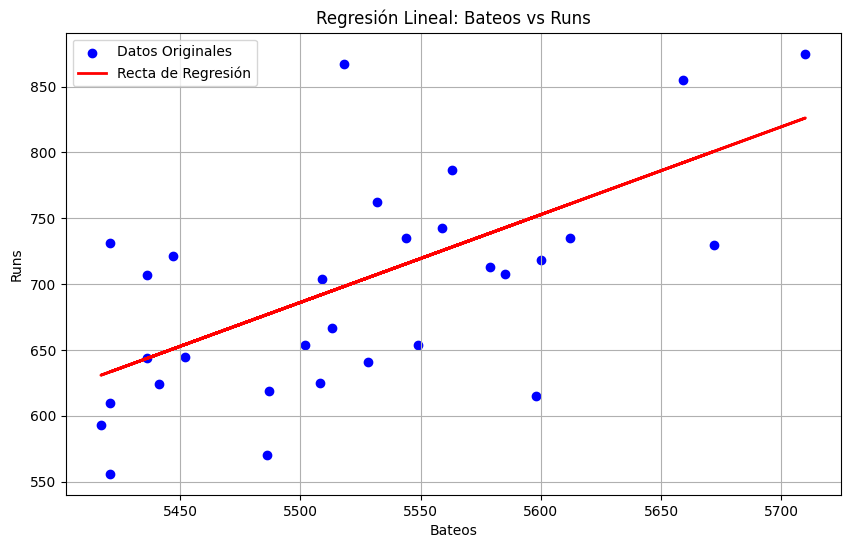

In [29]:
# Predicciones de la recta de regresión sobre todo el rango de datos
predicciones_totales = modelo.predict(X)

# Gráfica de dispersión de los datos originales
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos Originales')

# Gráfica de la recta de regresión
plt.plot(X, predicciones_totales, color='red', linewidth=2, label='Recta de Regresión')

plt.title('Regresión Lineal: Bateos vs Runs')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()

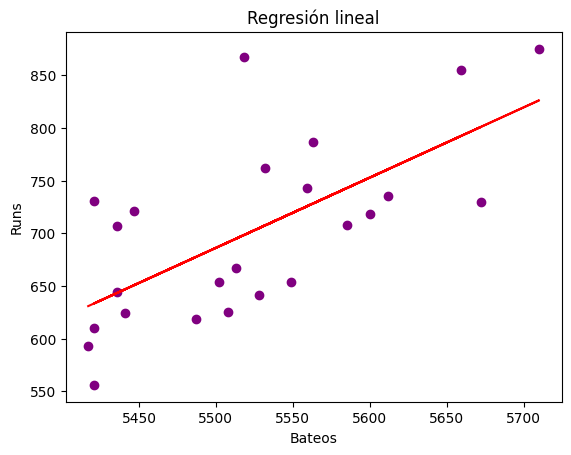

In [30]:
# Otra forma de Graficar los datos y la recta de regresión
plt.scatter(X_train, y_train, color='purple')
plt.plot(X_train, modelo.predict(X_train), color='red')
plt.title('Regresión lineal')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.show()

### 8. Obtenga las métricas: MAE, MSE, RMSE

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predicciones en el conjunto de prueba
predicciones_test = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predicciones_test)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, predicciones_test)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, predicciones_test, squared=False)

print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

Error Cuadrático Medio (MSE): 5219.975632116472
Error Absoluto Medio (MAE): 51.61164068147824
Raíz del Error Cuadrático Medio (RMSE): 72.24939883567525


In [9]:
# Otra forma de codigo
#Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Formatear la salida
print('Métricas:\n'
      ' - Error absoluto medio (MAE): {:.2f}\n'
      ' - Error cuadrático medio (MSE): {:.2f}\n'
      ' - Raíz del error cuadrático medio (RMSE): {:.2f}'.format(mae, mse, rmse))

Métricas:
 - Error absoluto medio (MAE): 51.61
 - Error cuadrático medio (MSE): 5219.98
 - Raíz del error cuadrático medio (RMSE): 72.25


Con base en el código suministrado, se llevó a cabo un análisis de regresión lineal para explorar la relación entre los 'bateos' y los 'runs' en varios equipos de béisbol.

Inicialmente, se efectuó un análisis exploratorio de los datos, incluyendo el cálculo de la correlación de Pearson, la cual evalúa la relación lineal entre dos variables. Un coeficiente cercano a 1 sugiere una correlación positiva fuerte, mientras que un valor cercano a -1 indica una correlación negativa robusta. Por otro lado, un valor próximo a 0 sugiere una falta de correlación.

A continuación, se procedió a dividir el conjunto de datos en una porción de entrenamiento y otra de prueba, utilizando el 80% de los datos para el entrenamiento y el 20% restante para la prueba. Se ajustó un modelo de regresión lineal a los datos de entrenamiento y se derivó la ecuación de la línea de regresión.

Se evaluó el rendimiento del modelo mediante el cálculo del error cuadrático medio (MSE), el cual indica el promedio de los errores en las predicciones del modelo. También se computó el error absoluto medio (MAE), que representa el promedio de los errores absolutos en las predicciones del modelo, y la raíz del error cuadrático medio (RMSE), que es la raíz cuadrada del MSE y proporciona una medida de error en las mismas unidades que la variable de respuesta.

Por último, se generaron gráficos para visualizar los datos y la línea de regresión, con el propósito de representar la relación entre los 'bateos' y los 'runs'.

Este análisis aborda la interrogante inicial sobre cómo la cantidad de 'bateos' en un equipo de béisbol se relaciona con los 'runs' obtenidos por el equipo. La información obtenida puede resultar valiosa para los equipos que buscan mejorar su rendimiento.